Step 1: Import data sets 

In [7]:
#import all the datasets 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid", palette="muted")
%matplotlib inline

Step 2: Load Dataset

In [8]:
#load the data set , print shape
df = pd.read_csv("spotify_tracks_scaled_standard_updated.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (58260, 23)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded,Tempo_Energy_Ratio
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1.650575,0.229889,0.0,0.602300,-0.959854,...,3.122013,-0.848139,-0.296661,1.730636,0.737639,-1.222973,0.0,acoustic,-1.797591,1.274258
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.876443,-1.211399,0.0,-1.157684,-2.332179,...,0.783356,2.134856,-0.296388,-0.662614,-1.098408,-1.596965,0.0,acoustic,-1.797591,0.684782
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.962458,-0.122893,0.0,-1.033935,-1.434353,...,0.061072,-0.253413,-0.296721,-0.513618,-1.700861,-1.638460,0.0,acoustic,-1.797591,1.142379
3,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,2.037640,-0.335790,0.0,0.203553,-1.043589,...,-0.047621,0.612920,-0.296721,-0.831166,-1.508240,-0.074171,0.0,acoustic,-1.797591,0.071079
4,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,1.005465,-0.062188,0.0,0.684799,-0.866815,...,1.789644,0.010835,-0.296721,0.156865,0.536821,-0.860745,0.0,acoustic,-1.797591,0.993112


Step 3: Select Numeric Features

In [9]:
# select only the numeric features for PCA 
features = [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 
    'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]
X = df[features]

y = df['track_genre']

print("Features shape:", X.shape)

Features shape: (58260, 15)


Step 4: Standardize Features

In [10]:
# standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 5: Apply PCA (95% Variance)

In [11]:
# apply PCA 
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("Reduced features after PCA:", X_pca.shape[1])

Original features: 15
Reduced features after PCA: 11


Step 6: Explained Variance Plot

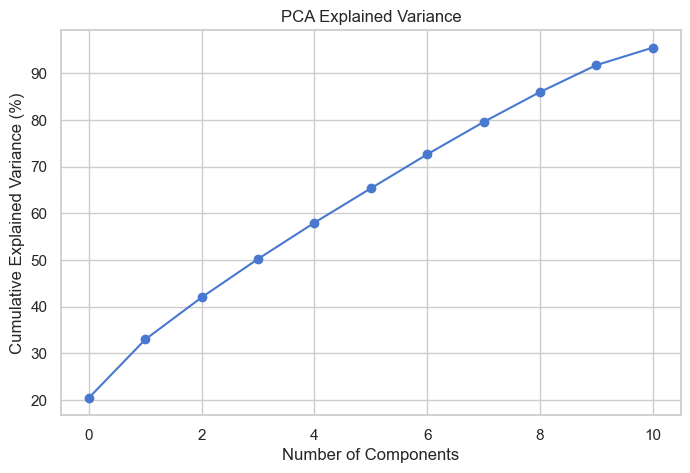

In [12]:
#plot the explained variance 
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

Step 7: 2D PCA Scatterplot

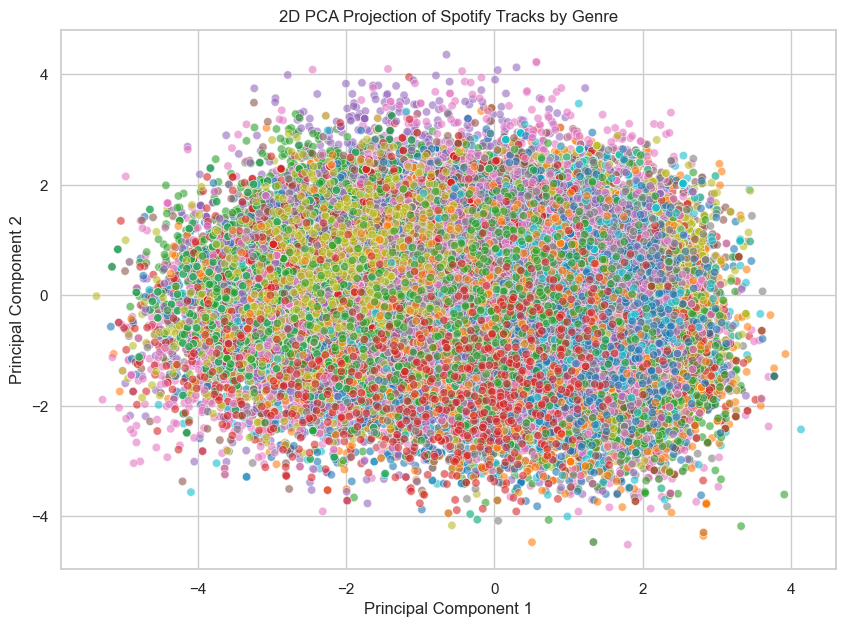

In [13]:
# visualize how different genres seperate in reduced space
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(
    x=X_pca_2d[:,0], y=X_pca_2d[:,1], 
    hue=y, alpha=0.6, palette="tab10", legend=False
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Spotify Tracks by Genre")
plt.show()

Step 8: save file 

In [26]:
#  Save Processed PCA Dataset (CSV )
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['track_genre'] = y.values  

# Save as CSV
df_pca.to_csv("spotify_tracks_PCA.csv", index=False)
# Save as excel
df_pca.to_excel("spotify_tracks_PCA.xlsx", index=False)

print("Processed PCA dataset saved as Excel & csv successfully!")
df_pca.head()

Processed PCA dataset saved as Excel & csv successfully!


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,track_genre
0,1.016555,0.729079,-0.498771,0.497072,-0.994121,3.179379,0.711082,-1.419033,0.137365,2.047580,-0.249022,acoustic
1,-4.652510,-0.036638,0.719287,0.536703,-0.462855,1.162824,1.144071,-1.423044,1.295391,0.359146,-0.655589,acoustic
2,-2.041396,-1.285413,0.336044,-1.031894,0.010800,1.163381,0.100814,-1.468367,1.355805,-0.252165,0.219157,acoustic
3,-1.879900,-0.724637,-0.031927,-1.221023,-0.733552,0.791827,1.618611,-0.425338,0.950112,-0.057730,0.681096,acoustic
4,-0.415345,1.002802,-0.165607,0.014534,-0.677063,0.813687,0.556093,-0.104409,1.315586,1.551876,-0.062576,acoustic
